In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#   **PCA, K Means, Logistic Regression and DecisionTree**

# Asteroid Impacts

****Dataset was taken from NASA JPL's 'Possible Asteroid Impact' dataset uploaded on Kaggle. I have modified the original dataset where the Hazardous values are separated from the object classification names for better implementation of multiple algorithms.
We will perform Principal Component Analysis and TRY to use the values thus derived into a K Means clustering visualization on the "Hazardous" target variable, followed by Logistic Regression(also Hazardous) and Decision Tree on the "Classification" target variable. Comments and suggestions are appreciated. Here's a link to the original dataset 
https://www.kaggle.com/nasa/asteroid-impacts ****


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the Data

In [ ]:
asteroid = pd.read_csv("../input/d/shrushtijoshi/asteroid-impacts/orbits - orbits.csv")

In [ ]:
asteroid.head()

In [ ]:
asteroid.describe()

In [ ]:
asteroid.info()

In [ ]:
asteroid.columns

Checking for null values

In [ ]:
sns.heatmap(asteroid.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [ ]:
asteroid.replace(np.nan, inplace = True)
asteroid=asteroid.dropna()
asteroid

Correlation Map


In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(asteroid.corr(),cmap="Blues",annot=True)

# Principal Component Analysis

Often used in high dimensionality data sets, where which variable calls the shots is difficult to estimate. PCA says hold my beer and does it for us. In other words, PCA calculates which feature is the driving feature in the dataset and explains the most variance. This is not to be confused with thinking that PCA finds the HIGHEST Variance, no. Dimensions thus decided are plotted orthogonally where the pc component with most variance is the main linear line. PCA tries to minimize loss in variance when the full power of variable(s) are not being taken fully into consideration in calculation of a model for a target variable. Here, Target Variable =  Hazardous

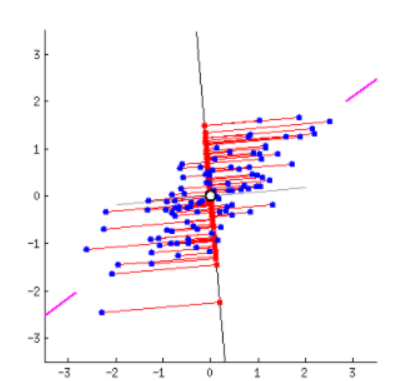

Here, as can be seen, there is a lot of loss in variance, due to an ill fitting line. PCA does operate on the understanding of Linear regression. However, should not be confused because it is an unsupervised algorithm.

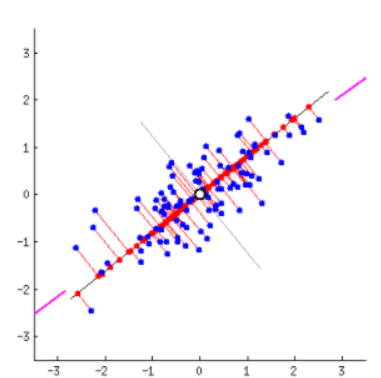

Here, as can be seen, there is a lesser loss in variance, due to an better fitting line. The second line is perpendicular (orthogonality) to the first and is indicative of the second PC Component. 

*****Scaling*****

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
variables= ['Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)',
       'Perihelion Distance (AU)', 'Aphelion Distance (AU)',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference', 'Asteroid Magnitude']
x = asteroid.loc[:, variables].values

In [ ]:
y = asteroid.loc[:,['Hazardous']].values

In [ ]:
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x.head()


***PCA***

In [ ]:
from sklearn.decomposition import PCA
pca=PCA()

Specifying number of pca components

In [ ]:
pca = PCA(n_components=4)

Size of dataset orginally

In [ ]:
x.shape

In [ ]:
x

In [ ]:
scaledwpca=pca.fit_transform(x)

Size of dataset after fitting it to PCA

In [ ]:
scaledwpca.shape

In [ ]:
scaledwpca=pd.DataFrame(scaledwpca)
scaledwpca.head()

Elbow Method graph

In [ ]:
PC_values=np.arange(pca.n_components_) + 3
plt.figure(figsize=(10,10))
plt.plot(PC_values,pca.explained_variance_ratio_,'ro-',linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Explained Variance")
plt.show()

Graph shows the elbow point at 4 clusters after which it starts declining steadily

Proportion of explained variance is individual variances dvided by summation of all variances in the components.

In [ ]:
print("Explained Variance", pca.explained_variance_)
print("Proportion of Explained Variance", pca.explained_variance_ratio_)

In [ ]:
import numpy as np
print('Cumulative Proportion of Explained Variance',np.cumsum(pca.explained_variance_ratio_))

In [ ]:
scaledwpca['Hazardous'] = y
scaledwpca.columns=['PC1','PC2','PC3','PC4','Hazardous']
scaledwpca.head()

Putting the pc components in a dataset for K Means

In [ ]:
pcak = pd.DataFrame(scaledwpca)
pcak.head()

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [ ]:
asteroid.info()

**K MEANS CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wss=[]
k = range(1,13)
for i in k:
    kmeans_pca=KMeans(n_clusters = i)
    kmeans_pca.fit(pcak)
    wss.append(kmeans_pca.inertia_)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(k,wss,'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("WSS")
plt.title("KMeans with PCA CLUSTERS")
plt.show()

In [ ]:
kmeans_pca.cluster_centers_

In [ ]:
k_means = KMeans(n_clusters = 4, random_state = 42)
k_means.fit(pcak[['PC1', 'PC2', 'PC3', 'PC4']])

In [ ]:
pcak['KMeans_labels'] = k_means.labels_

#Plotting resulting clusters
plt.figure(figsize = (10, 10))
plt.scatter(pcak['PC1'], pcak['PC3'], c = pcak['KMeans_labels'])
plt.title('K-Means Clustering', fontsize = 22)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)

In [ ]:
pcak['KMeans_labels'] = k_means.labels_

plt.figure(figsize = (10, 10))
plt.scatter(pcak['PC3'], pcak['PC4'], c = pcak['KMeans_labels'])
plt.title('K-Means Clustering', fontsize = 22)
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)

# Logistic Regression

Target Variable = Hazardous

In [ ]:
x = asteroid.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13]].values
y = asteroid.iloc[:,[15]].values

In [ ]:
x

In [ ]:
y

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)
cm

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy  = accuracy_score(Y_test,Y_pred)
accuracy

In [ ]:
print("Accuracy for LogReg model is",accuracy*100)

# Decision Tree

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
asteroid.head()

In [ ]:
features = ['Epoch (TDB)', 'Orbit Axis (AU)', 'Orbit Eccentricity',
       'Orbit Inclination (deg)', 'Perihelion Argument (deg)',
       'Node Longitude (deg)', 'Mean Anomoly (deg)',
       'Perihelion Distance (AU)', 'Aphelion Distance (AU)',
       'Orbital Period (yr)', 'Minimum Orbit Intersection Distance (AU)',
       'Orbital Reference', 'Asteroid Magnitude']
X = asteroid[features]
y = asteroid['Classification']

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
dec = DecisionTreeClassifier()

dec = dec.fit(X_train,y_train)

In [ ]:
y_pred = dec.predict(X_test)

In [ ]:
from sklearn import tree

In [ ]:
fig = plt.figure(figsize=(25,20))
DecisionTree= tree.plot_tree(dec,feature_names=features,filled=True)

Understanding the decision tree in a text format

In [ ]:
print(tree.export_text(dec))

In [ ]:
print("Accuracy of decision tree is:",metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:
print("Accuracy of Logistic Regression Model is :",accuracy*100)
print("Accuracy of Decision Tree Model is:",metrics.accuracy_score(y_test, y_pred)*100)